### Reading the .txt files using pandas instead of File.io then proceeded with the metro network visualisation usinf different factors like routes.txt, shapes.txt, trips.txt

In [199]:
import pandas as pd 
import numpy as np

df = pd.read_csv('agency.txt')
df.head()


,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone,agency_fare_url,agency_email
0,DMRC,Delhi Metro Rail Corporation,http://www.delhimetrorail.com/,Asia/Kolkata,NaN,NaN,NaN,NaN


In [200]:
df = pd.read_csv('calendar.txt')
df.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,weekday,1,1,1,1,1,0,0,20190101,20251231
1,saturday,0,0,0,0,0,1,0,20190101,20251231
2,sunday,0,0,0,0,0,0,1,20190101,20251231


In [201]:
df = pd.read_csv('routes.txt')
df.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,route_sort_order,continuous_pickup,continuous_drop_off
0,33,NaN,R_SP_R,RAPID_Phase 3 (Rapid Metro) to Sector 55-56 (R...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
1,31,NaN,G_DD_R,GRAY_Dhansa Bus Stand to Dwarka,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,29,NaN,P_MS_R,PINK_Shiv Vihar to Majlis Park,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
3,12,NaN,M_JB,MAGENTA_Janak Puri West to Botanical Garden,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,P_MS,PINK_Majlis Park to Shiv Vihar,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
df = pd.read_csv('shapes.txt')
df.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,shp_1_2,28.615887,77.022461,1,0.000
1,shp_1_2,28.616341,77.022499,2,50.510
2,shp_1_2,28.617985,77.022453,3,233.586
3,shp_1_2,28.618252,77.022453,4,263.487
4,shp_1_2,28.618425,77.022438,5,282.857


In [203]:
df = pd.read_csv('stop_times.txt')
df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,continuous_pickup,continuous_drop_off
0,0,05:28:08,05:28:28,21,0,NaN,0,0,0.000,1,NaN,NaN
1,0,05:30:58,05:31:18,20,1,NaN,0,0,1202.405,1,NaN,NaN
2,0,05:33:28,05:33:48,19,2,NaN,0,0,2480.750,1,NaN,NaN
3,0,05:35:33,05:35:53,18,3,NaN,0,0,3314.936,1,NaN,NaN
4,0,05:37:53,05:38:13,17,4,NaN,0,0,4300.216,1,NaN,NaN


In [204]:
df = pd.read_csv('stops.txt')
df.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon
0,1,NaN,Dilshad Garden,NaN,28.675991,77.321495
1,2,NaN,Jhilmil,NaN,28.675648,77.312393
2,3,NaN,Mansrover park,NaN,28.675352,77.301178
3,4,NaN,Shahdara,NaN,28.673531,77.287270
4,5,NaN,Welcome,NaN,28.671986,77.277931


In [205]:
df = pd.read_csv('trips.txt')
df.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,0,weekday,0,NaN,NaN,NaN,NaN,shp_1_30,0,0
1,0,weekday,1,NaN,NaN,NaN,NaN,shp_1_30,0,0
2,0,weekday,10,NaN,NaN,NaN,NaN,shp_1_30,0,0
3,0,weekday,100,NaN,NaN,NaN,NaN,shp_1_30,0,0
4,2,weekday,1000,NaN,NaN,NaN,NaN,shp_1_13,0,0


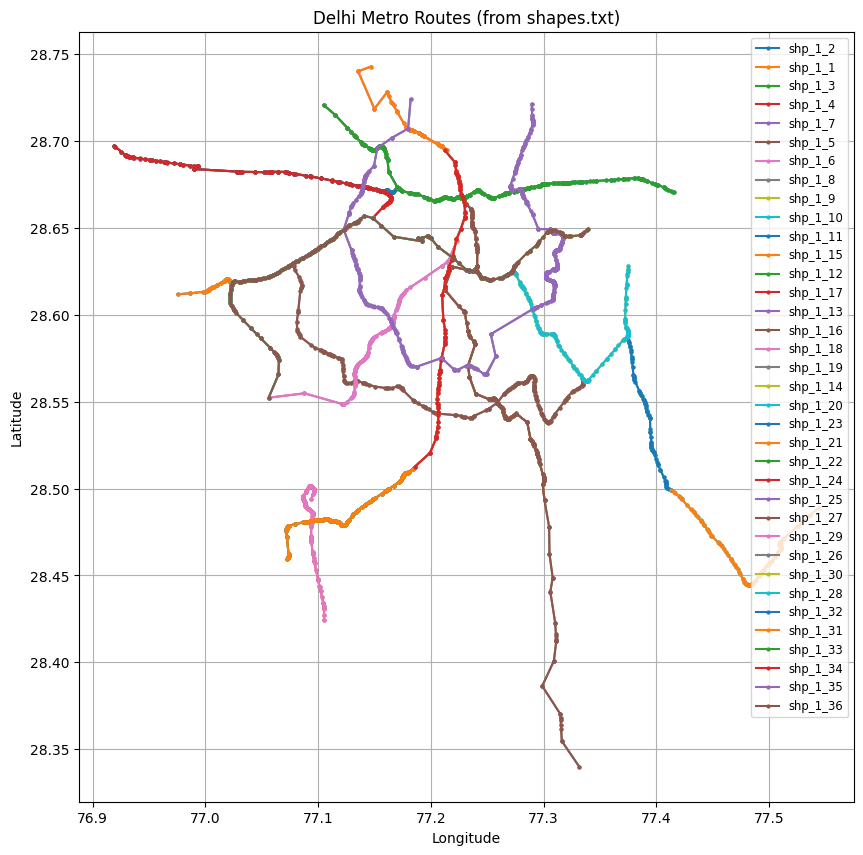

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

shapes_df = pd.read_csv('shapes.txt')

# Convert to numeric just in case
shapes_df['shape_pt_lat'] = pd.to_numeric(shapes_df['shape_pt_lat'], errors='coerce')
shapes_df['shape_pt_lon'] = pd.to_numeric(shapes_df['shape_pt_lon'], errors='coerce')

# Plot each shape_id separately
plt.figure(figsize=(10, 10))
for shape_id in shapes_df['shape_id'].unique():
    shape = shapes_df[shapes_df['shape_id'] == shape_id].sort_values('shape_pt_sequence')
    plt.plot(shape['shape_pt_lon'], shape['shape_pt_lat'], label=shape_id, marker='o', markersize=2)

plt.title('Delhi Metro Routes (from shapes.txt)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.show()


### Metro Route Paths Visualization

This plot displays the geographical paths of all Delhi Metro lines using latitude and longitude coordinates from the `shapes.txt` file.

- **Each colored line** represents a different `shape_id`, which corresponds to a unique route or route pattern in the metro system.
- The **x-axis** shows longitude and the **y-axis** shows latitude, accurately mapping the metro lines over the city.
- **Markers** indicate the sequence of points along each route, helping to visualize the direction and shape of each line.

#### Insights:
- This visualization helps understand the spatial coverage and network layout of the Delhi Metro system.
- You can identify how different lines traverse the city, where they overlap, and which areas have the densest metro coverage.
- Useful for route planning, accessibility analysis, and urban transit studies.

   route_id  agency_id route_short_name  \
0        33        NaN           R_SP_R   
1        31        NaN           G_DD_R   
2        29        NaN           P_MS_R   
3        12        NaN             M_JB   
4        11        NaN             P_MS   

                                     route_long_name  route_desc  route_type  \
0  RAPID_Phase 3 (Rapid Metro) to Sector 55-56 (R...         NaN           1   
1                    GRAY_Dhansa Bus Stand to Dwarka         NaN           1   
2                     PINK_Shiv Vihar to Majlis Park         NaN           1   
3        MAGENTA_Janak Puri West to Botanical Garden         NaN           1   
4                     PINK_Majlis Park to Shiv Vihar         NaN           1   

   route_url  route_color  route_text_color  route_sort_order  \
0        NaN          NaN               NaN               NaN   
1        NaN          NaN               NaN               NaN   
2        NaN          NaN               NaN               NaN   


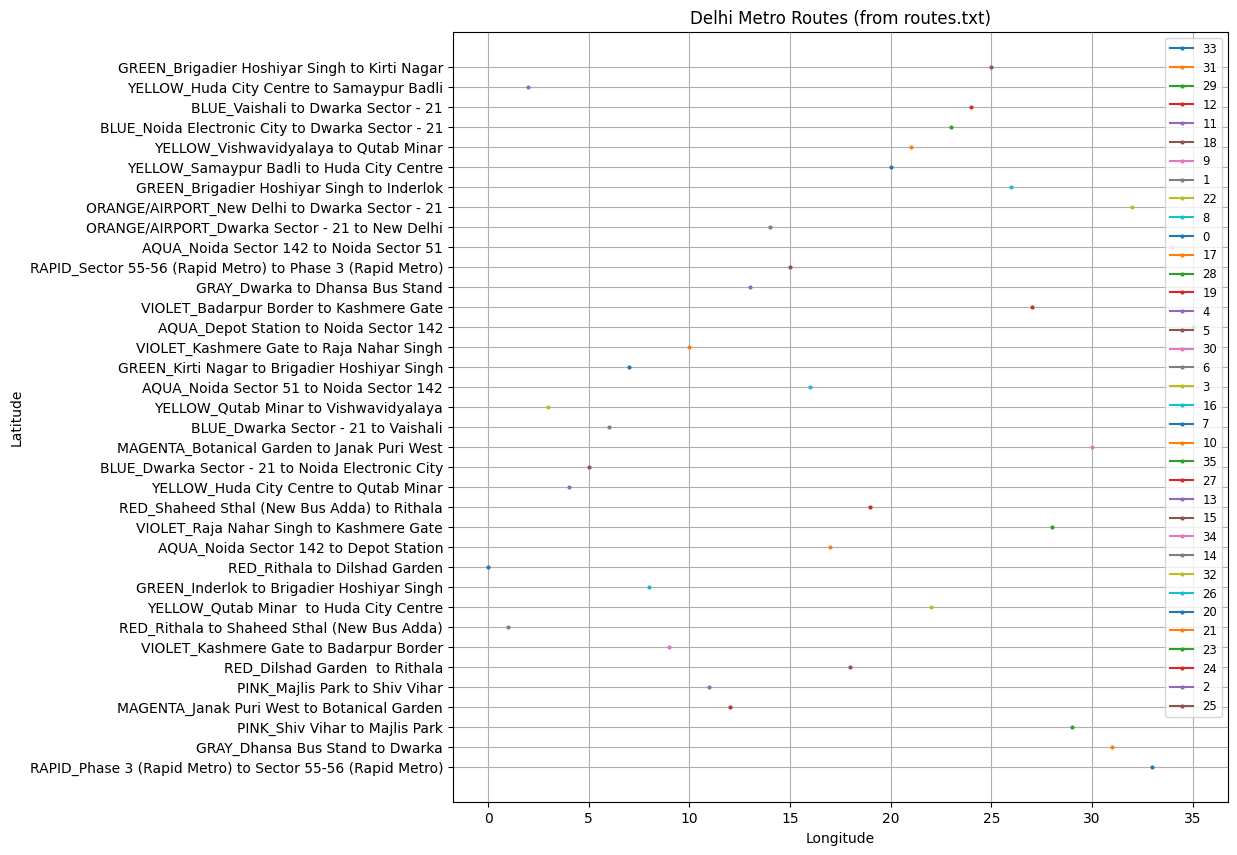

In [207]:
import pandas as pd
import matplotlib.pyplot as plt

# Load routes.txt
routes_df = pd.read_csv("routes.txt")
print(routes_df.head())

# Optional: view route_id and route_name mapping
for _, row in routes_df.iterrows():
    print(f"Route ID: {row['route_id']}, Name: {row.get('route_long_name', row.get('route_short_name', ''))}")

# Plot each shape_id separately
plt.figure(figsize=(10, 10))
for route_id in routes_df['route_id'].unique():
    route = routes_df[routes_df['route_id'] == route_id].sort_values('route_long_name')
    plt.plot(route['route_id'], route['route_long_name'], label=route_id, marker='o', markersize=2)

plt.title('Delhi Metro Routes (from routes.txt)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.show()



### Route Names Visualization

This plot provides a visual overview of the different metro routes in Delhi using data from `routes.txt`.

- **Each point** represents a unique metro route, with the x-axis showing the `route_id` and the y-axis showing the corresponding route name (`route_long_name`).
- **Each color/marker** corresponds to a different route, making it easy to distinguish between them.
- This visualization helps in:
  - Quickly identifying all available metro routes.
  - Comparing route names and their associated IDs.

   stop_id  stop_code       stop_name  stop_desc   stop_lat   stop_lon
0        1        NaN  Dilshad Garden        NaN  28.675991  77.321495
1        2        NaN         Jhilmil        NaN  28.675648  77.312393
2        3        NaN  Mansrover park        NaN  28.675352  77.301178
3        4        NaN        Shahdara        NaN  28.673531  77.287270
4        5        NaN         Welcome        NaN  28.671986  77.277931


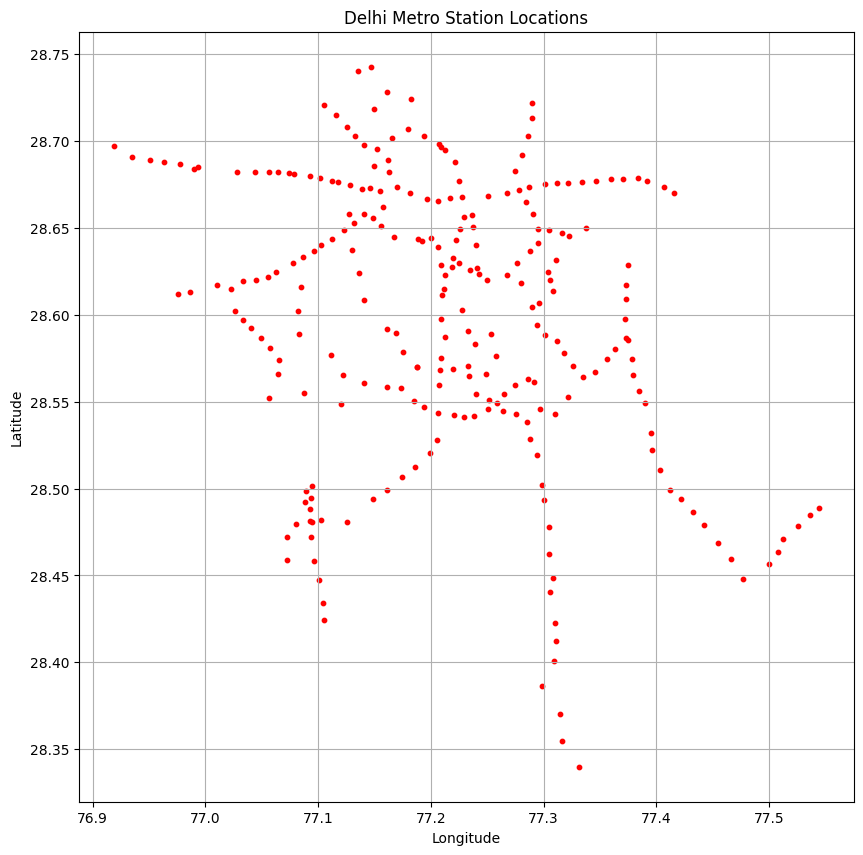

In [208]:
# Load stops.txt
stops_df = pd.read_csv("stops.txt")
print(stops_df.head())

# Optional: plot stops directly
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(stops_df['stop_lon'], stops_df['stop_lat'], c='red', s=10)
plt.title("Delhi Metro Station Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


In [209]:
# Load both files
stop_times_df = pd.read_csv("stop_times.txt")
trips_df = pd.read_csv("trips.txt")

# Merge trips with stop_times to map stop_ids to route_ids
merged_df = pd.merge(stop_times_df, trips_df, on="trip_id")

# Join with stops to get stop names and coordinates
stops_df = pd.read_csv("stops.txt")
final_df = pd.merge(merged_df, stops_df, on="stop_id")

# Join with routes to get route names
routes_df = pd.read_csv("routes.txt")
final_df = pd.merge(final_df, routes_df, on="route_id")

# Optional: See sample result
print(final_df[['route_id', 'route_long_name', 'stop_name', 'stop_lat', 'stop_lon']].drop_duplicates().head(10))

   route_id                route_long_name            stop_name   stop_lat  \
0         0  RED_Rithala to Dilshad Garden              Rithala  28.720821   
1         0  RED_Rithala to Dilshad Garden          Rohini West  28.715008   
2         0  RED_Rithala to Dilshad Garden          Rohini East  28.707941   
3         0  RED_Rithala to Dilshad Garden            Pitampura  28.703180   
4         0  RED_Rithala to Dilshad Garden        Kohat Enclave  28.697943   
5         0  RED_Rithala to Dilshad Garden  Netaji Subash Place  28.695637   
6         0  RED_Rithala to Dilshad Garden         Keshav Puram  28.688944   
7         0  RED_Rithala to Dilshad Garden       Kanhaiya Nagar  28.682386   
8         0  RED_Rithala to Dilshad Garden             Inderlok  28.673452   
9         0  RED_Rithala to Dilshad Garden        Shastri Nagar  28.670135   

    stop_lon  
0  77.105042  
1  77.115746  
2  77.125732  
3  77.132355  
4  77.140465  
5  77.152428  
6  77.161774  
7  77.162552  
8  77.

### Delhi Metro Station Locations

This scatter plot visualizes the geographical distribution of all Delhi Metro stations using data from the `stops.txt` file.

- **Each red dot** represents an individual metro station, plotted by its longitude (x-axis) and latitude (y-axis).
- The plot provides a clear overview of how metro stations are spread across Delhi and surrounding areas.
- **Densely clustered areas** indicate zones with high metro accessibility.

#### Insights:
- This visualization is useful for analyzing stop coverage, planning accessibility improvements, and spotting areas with low metro presence.
- It helps urban planners and transit authorities understand the spatial reach of metro systems

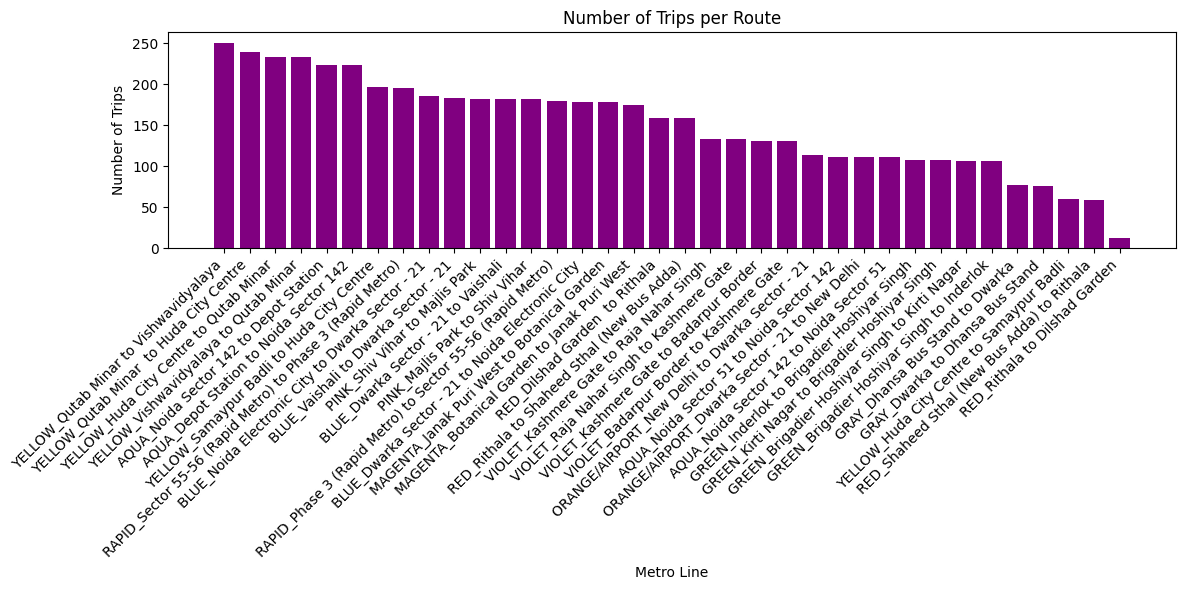

In [210]:

# Count trips per route
trip_counts = trips_df['route_id'].value_counts().reset_index()
trip_counts.columns = ['route_id', 'trip_count']

# Add route names
trip_counts = trip_counts.merge(routes_df[['route_id', 'route_long_name']], on='route_id', how='left')

# Plot
plt.figure(figsize=(12, 6))
plt.bar(trip_counts['route_long_name'], trip_counts['trip_count'], color='purple')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Metro Line")
plt.ylabel("Number of Trips")
plt.title("Number of Trips per Route")
plt.tight_layout()
plt.show()


### Number of Trips per Metro Route

This bar chart shows the number of scheduled trips for each Delhi Metro line, using data from the `trips.txt` and `routes.txt` files.

- **X-axis:** Metro line names (`route_long_name`).
- **Y-axis:** Number of trips scheduled for each line.
- **Bar color:** Each bar is colored purple for visual clarity.

#### Insights:
- The chart helps identify which metro lines have the highest and lowest number of scheduled trips.
- Lines with more trips are likely to serve busier or longer routes, while those with fewer trips may be less frequented or serve special purposes.
- This visualization is useful for analyzing service frequency, identifying heavily used lines, and planning resource allocation or schedule adjustments.